In [1]:
import matplotlib.pyplot as plt

import fdtd
import fdtd.backend as bd

In [2]:
fdtd.set_backend("numpy")

In [3]:
# "Constants"
WAVELENGTH = 1550e-9
SPEED_LIGHT: float = 299_792_458.0  # [m/s] speed of light

In [4]:
# "Simulation"
## create FDTD Grid
grid = fdtd.Grid(
    (2.5e-5, 1.5e-5, 1),
    grid_spacing=0.1 * WAVELENGTH,
    permittivity=1.0,
    permeability=1.0,
)



In [5]:
## boundaries
# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

grid[:, :, 0] = fdtd.PeriodicBoundary(name="zbounds")

In [6]:
## source
grid[50:55, 70:75, 0] = fdtd.LineSource(
    period=WAVELENGTH / SPEED_LIGHT, name="linesource"
)
grid[100, 60, 0] = fdtd.PointSource(
    period=WAVELENGTH / SPEED_LIGHT, name="pointsource",
)

In [7]:
## detectors
grid[12e-6, :, 0] = fdtd.LineDetector(name="detector")

In [8]:
## objects
grid[11:32, 30:84, 0:1] = fdtd.AnisotropicObject(permittivity=2.5, name="object")

In [9]:
# Run simulation
grid.run(50, progress_bar=False)

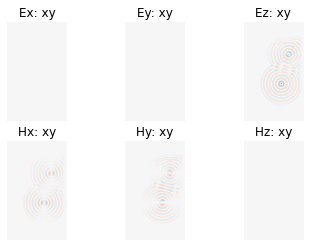

In [10]:
# Visualization
fig, axes = plt.subplots(2, 3, squeeze=False)
titles = ["Ex: xy", "Ey: xy", "Ez: xy", "Hx: xy", "Hy: xy", "Hz: xy"]

fields = bd.stack(
    [
        grid.E[:, :, 0, 0],
        grid.E[:, :, 0, 1],
        grid.E[:, :, 0, 2],
        grid.H[:, :, 0, 0],
        grid.H[:, :, 0, 1],
        grid.H[:, :, 0, 2],
    ]
)

m = max(abs(fields.min().item()), abs(fields.max().item()))

for ax, field, title in zip(axes.ravel(), fields, titles):
    ax.set_axis_off()
    ax.set_title(title)
    ax.imshow(bd.numpy(field), vmin=-m, vmax=m, cmap="RdBu")

plt.show()

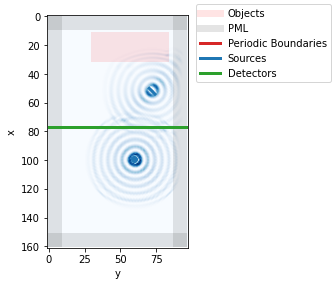

In [11]:
plt.figure()
grid.visualize(z=0)